# <center><b><u>The Spark Foundation</u></b></center>
## Task 4 : Stock Market Prediction using Numerical & Textual Analysis
### Sentimental Analysis
In this task we will create a Hybrid Model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

## Name : Mansi Panchal   

#### Step 1 - Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 2 - Loading Datasets 

In [2]:
td = pd.read_csv('Combined_News_DJIA.csv') # Textual Data
nd = pd.read_csv('upload_DJIA_table.csv') # Numerical Data

In [3]:
print("Textual Data")
td.head()

Textual Data


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [4]:
print("Numerical Data")
nd.head()

Numerical Data


,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


#### Step - 3 Combine Data

In [5]:
headlines = []
for row in range(0,len(td.index)):
    headlines.append(' '.join(str(x) for x in td.iloc[row,2:27]))

#### Step - 4 Data Cleaning

In [6]:
import re

clean_headlines = []
for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
  clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
  clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

td['Combined_News'] = clean_headlines

#### Step - 5 Frequancy Analysis

In [7]:
pip install wordcloud

In [8]:
import collections
import matplotlib.cm as cm
from matplotlib.pyplot import figure
from matplotlib import rcParams
from wordcloud import WordCloud as wc
from wordcloud import STOPWORDS as sw

In [9]:
print(td.columns)

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Combined_News'],
      dtype='object')


In [10]:
td.isnull().sum()

Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
Combined_News    0
dtype: int64

In [11]:
all_headlines = ' '.join(td['Combined_News'].str.lower())
SW = sw
SW.add('will')
WC = wc(stopwords=SW).generate(all_headlines)

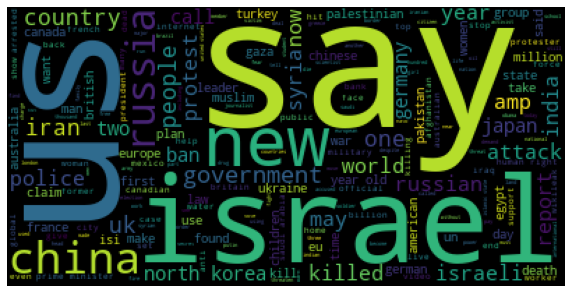

In [12]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(WC)
plt.axis("off")
plt.show()

#### Step 6 - Visualizing Data

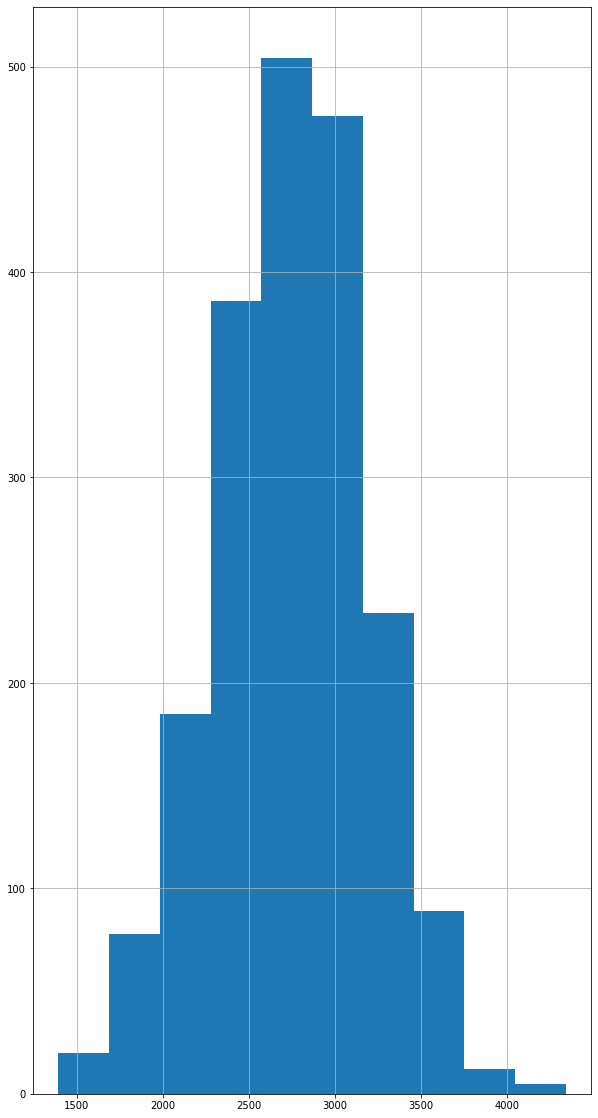

<Figure size 432x288 with 0 Axes>

In [13]:
td['Combined_News'].str.len().hist()
plt.figure(figsize=(6,4))
plt.show()

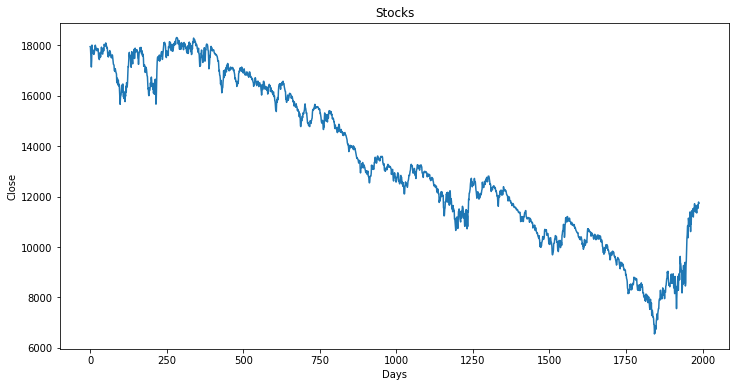

In [14]:
plt.figure(figsize=(12,6))
plt.title('Stocks')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(nd['Close'])
plt.show()

#### Step 7 - Applying Auto ARIMA Model

In [15]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 2.6MB/s 


In [16]:
from pyramid.arima import auto_arima as aa

nd.fillna(0,inplace=True)

train = nd[:783]
valid = nd[783:]

training = train['Close']
validation = valid['Close']

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

In [17]:
model = aa(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9852.543, BIC=9875.775, Fit time=8.385 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=10320.078, BIC=10329.371, Fit time=0.083 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=10082.781, BIC=10101.366, Fit time=2.966 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9857.185, BIC=9875.770, Fit time=3.762 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=9860.760, BIC=9888.639, Fit time=8.628 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=10323.864, BIC=10342.449, Fit time=0.445 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=9854.430, BIC=9882.309, Fit time=27.343 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=9856.228, BIC=9888.752, Fit time=42.403 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9854.465, BIC=9882.344, Fit time=14.664 seconds
Fit ARIMA: order=(1

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [18]:
forecast = model.predict(n_periods=1206)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

6791.736576159272

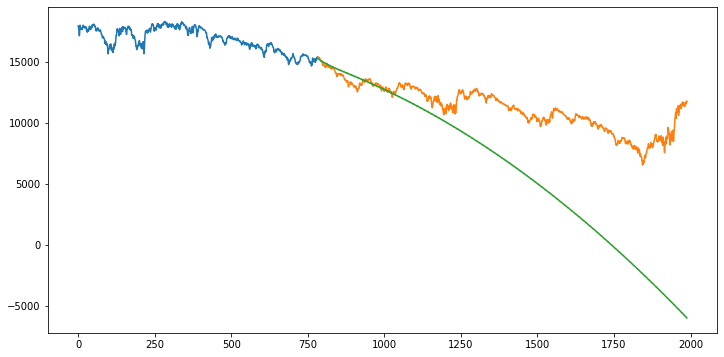

In [19]:
plt.figure(figsize=(12,6))
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

#### Step 8 - Applying Vader Model for Sentimental Analysis

In [20]:
pip install vaderSentiment


     |████████████████████████████████| 133kB 2.8MB/s 


In [21]:
pip install textblob

In [22]:
from textblob import TextBlob as tb
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sa

##### Merging Data

In [23]:
md = td.merge(nd, how='inner', on='Date', left_index = True)
md.fillna(0, inplace=True)  
md.reset_index(inplace = True,drop=True)
md.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US

In [24]:
def getSubjectivity(text):
  return tb(text).sentiment.subjectivity

def getPolarity(text):
  return  tb(text).sentiment.polarity

In [25]:
md['Subjectivity'] =md['Combined_News'].apply(getSubjectivity)
md['Polarity'] =md['Combined_News'].apply(getPolarity)

In [26]:
def getSIA(text):
  S = sa()
  sentiment = S.polarity_scores(text)
  return sentiment

In [27]:
compound = []
neg = []
neu = []
pos = []
SA = 0
for i in range(0, len(md['Combined_News'])):
  SA = getSIA(md['Combined_News'][i])
  compound.append(SA['compound'])
  neg.append(SA['neg'])
  neu.append(SA['neu'])
  pos.append(SA['pos'])

In [28]:
md['Compound'] =compound
md['Negative'] =neg
md['Neutral'] =neu
md['Positive'] = pos

##### Visualization

<BarContainer object of 2 artists>

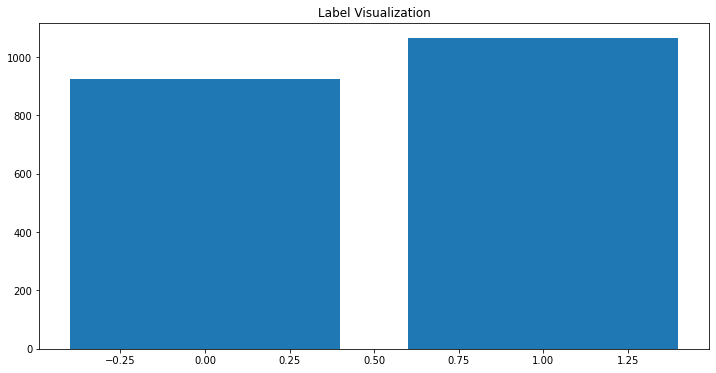

In [29]:
plt.figure(figsize=(12,6))
plt.title("Label Visualization")
plt.bar(md.Label.value_counts().index, md.Label.value_counts())

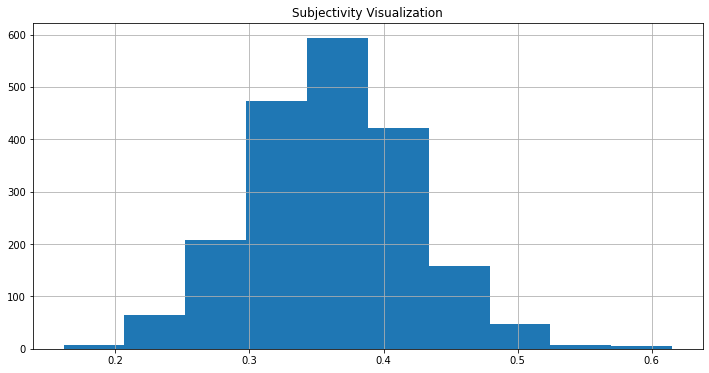

In [30]:
plt.figure(figsize=(12,6))
plt.title("Subjectivity Visualization")
md['Subjectivity'].hist()

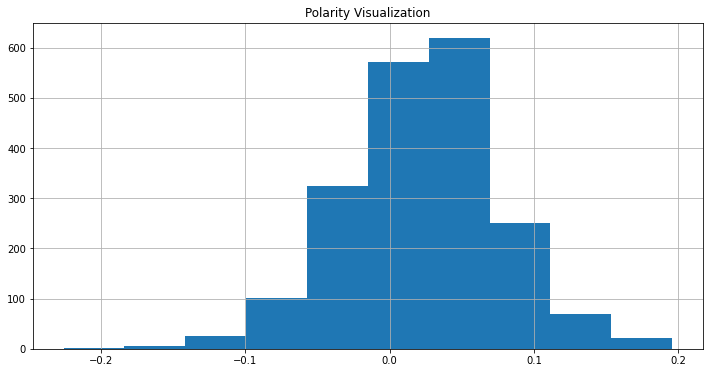

In [31]:
plt.figure(figsize=(12,6))
plt.title("Polarity Visualization")
md['Polarity'].hist()

#### Step 9 - Model Training

In [32]:
col = [ 'Open',  'High', 'Low','Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive','Label']
df = md[col]
df.head()

,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.724,0.041,0
1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.721,0.089,1
2,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.816,0.056,0
3,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.788,0.066,0
4,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.717,0.094,1


In [33]:
from sklearn.model_selection import train_test_split as tts

X =df.drop('Label', axis=1)
y =df['Label']

x_train, x_test, y_train, y_test = tts(X, y, test_size=0.2, random_state = 0,stratify=y)

##### SVM Analysis

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel='poly',degree=3,class_weight='balanced')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
from sklearn.metrics import classification_report as cr

y_pred = svc.predict(x_test)

p = cr(y_test,y_pred)
print(p)

              precision    recall  f1-score   support

           0       0.43      0.02      0.03       185
           1       0.53      0.98      0.69       213

    accuracy                           0.53       398
   macro avg       0.48      0.50      0.36       398
weighted avg       0.49      0.53      0.38       398



##### Linear Discriminant Analysis

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
LDA = lda()
LDA.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [37]:
y_pred = LDA.predict(x_test)

p = cr(y_test,y_pred)
print(p)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       185
           1       0.86      0.85      0.86       213

    accuracy                           0.85       398
   macro avg       0.85      0.85      0.85       398
weighted avg       0.85      0.85      0.85       398



##### Decision Tree Analysis

In [38]:
from sklearn.tree import DecisionTreeClassifier as dtc
DTC = dtc()
DTC.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
y_pred = DTC.predict(x_test)

p = cr(y_test,y_pred)
print(p)

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       185
           1       0.58      0.56      0.57       213

    accuracy                           0.55       398
   macro avg       0.54      0.54      0.54       398
weighted avg       0.55      0.55      0.55       398

